In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer

In [2]:
folder1=r"D:\VIT Studies\CV\CV_CP_Dataset\content\Trees_Update"
folder2=r"D:\VIT Studies\CV\CV_CP_Dataset\content\Streetlights_update"
folder3=r"D:\VIT Studies\CV\CV_CP_Dataset\content\Negatives"

In [3]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100, 133)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('D:\VIT Studies\CV\Positive and Negative\Trees.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (177, 128)
descriptor shape  1  :  (148, 128)
descriptor shape  2  :  (85, 128)
descriptor shape  3  :  (132, 128)
descriptor shape  4  :  (191, 128)
descriptor shape  5  :  (183, 128)
descriptor shape  6  :  (152, 128)
descriptor shape  7  :  (90, 128)
descriptor shape  8  :  (81, 128)
descriptor shape  9  :  (159, 128)
descriptor shape  10  :  (135, 128)
descriptor shape  11  :  (89, 128)
descriptor shape  12  :  (179, 128)
descriptor shape  13  :  (121, 128)
descriptor shape  14  :  (110, 128)
descriptor shape  15  :  (202, 128)
descriptor shape  16  :  (100, 128)
descriptor shape  17  :  (129, 128)
descriptor shape  18  :  (121, 128)
descriptor shape  19  :  (163, 128)
descriptor shape  20  :  (151, 128)
descriptor shape  21  :  (66, 128)
descriptor shape  22  :  (208, 128)
descriptor shape  23  :  (202, 128)
descriptor shape  24  :  (135, 128)
descriptor shape  25  :  (163, 128)
descriptor shape  26  :  (165, 128)
descriptor shape  27  :  (122, 128)
descrip

In [4]:
data1 = pd.read_csv(r'D:\VIT Studies\CV\Positive and Negative\Trees.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.003909,0.000000,0.003909,0.097718,0.171983,0.050813,0.005863,0.001954,0.115307,0.041041,...,0.000000,0.039087,0.003909,0.001954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.201148,0.019529,0.001953,0.003906,0.001953,0.000000,0.000000,0.003906,0.371050,0.035152,...,0.001953,0.001953,0.000000,0.003906,0.007812,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029323,0.007820,...,0.041052,0.033233,0.267818,0.074285,0.113383,0.007820,0.009774,0.013684,0.005865,0.242405
3,0.000000,0.000000,0.000000,0.001955,0.019553,0.000000,0.000000,0.000000,0.080166,0.005866,...,0.000000,0.009776,0.025419,0.076256,0.103630,0.078211,0.009776,0.000000,0.000000,0.005866
4,0.000000,0.000000,0.001954,0.003907,0.003907,0.007815,0.001954,0.000000,0.048841,0.000000,...,0.001954,0.021490,0.021490,0.140663,0.074239,0.074239,0.060563,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428222,0.003912,0.013691,0.134954,0.078234,0.001956,0.000000,0.000000,0.000000,0.001956,0.003912,...,0.046940,0.074322,0.005868,0.009779,0.029338,0.039117,0.029338,0.048896,0.037161,0.019558
428223,0.023412,0.033167,0.035118,0.050727,0.054629,0.042922,0.021461,0.011706,0.101453,0.156082,...,0.001951,0.035118,0.042922,0.015608,0.000000,0.000000,0.000000,0.000000,0.005853,0.054629
428224,0.021536,0.007831,0.000000,0.000000,0.000000,0.001958,0.013705,0.019579,0.231027,0.001958,...,0.092019,0.021536,0.025452,0.033284,0.025452,0.092019,0.043073,0.001958,0.017621,0.033284
428225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003909,0.000000,...,0.001955,0.009773,0.000000,0.000000,0.254093,0.254093,0.029318,0.070364,0.009773,0.000000


In [5]:
i=0
for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100, 133)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('D:\VIT Studies\CV\Positive and Negative\Streetlights.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (53, 128)
descriptor shape  1  :  (77, 128)
descriptor shape  2  :  (42, 128)
descriptor shape  3  :  (51, 128)
descriptor shape  4  :  (43, 128)
descriptor shape  5  :  (53, 128)
descriptor shape  6  :  (56, 128)
descriptor shape  7  :  (26, 128)
descriptor shape  8  :  (71, 128)
descriptor shape  9  :  (75, 128)
descriptor shape  10  :  (84, 128)
descriptor shape  11  :  (55, 128)
descriptor shape  12  :  (2, 128)
descriptor shape  13  :  (32, 128)
descriptor shape  14  :  (23, 128)
descriptor shape  15  :  (47, 128)
descriptor shape  16  :  (56, 128)
descriptor shape  17  :  (65, 128)
descriptor shape  18  :  (37, 128)
descriptor shape  19  :  (12, 128)
descriptor shape  20  :  (14, 128)
descriptor shape  21  :  (94, 128)
descriptor shape  22  :  (61, 128)
descriptor shape  23  :  (34, 128)
descriptor shape  24  :  (89, 128)
descriptor shape  25  :  (26, 128)
descriptor shape  26  :  (81, 128)
descriptor shape  27  :  (91, 128)
descriptor shape  28  :  (96, 1

In [6]:
data2 = pd.read_csv(r'D:\VIT Studies\CV\Positive and Negative\Streetlights.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data2=data2.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.056732,0.156502,0.000000,0.000000,0.000000,0.005869,0.001956,0.000000,0.033257,...,0.000000,0.117376,0.037169,0.000000,0.000000,0.000000,0.000000,0.001956,0.013694,0.017606
1,0.019514,0.003903,0.000000,0.003903,0.013660,0.017562,0.017562,0.019514,0.124888,0.013660,...,0.027319,0.165866,0.027319,0.003903,0.007805,0.054638,0.255629,0.066347,0.019514,0.076103
2,0.089836,0.009765,0.005859,0.000000,0.000000,0.000000,0.000000,0.015624,0.259743,0.007812,...,0.058589,0.199202,0.019530,0.001953,0.001953,0.017577,0.095695,0.039059,0.072259,0.066401
3,0.195536,0.111456,0.000000,0.000000,0.003911,0.013688,0.003911,0.005866,0.037152,0.046929,...,0.003911,0.009777,0.132965,0.013688,0.005866,0.015643,0.011732,0.025420,0.078215,0.136875
4,0.019540,0.054711,0.105514,0.127008,0.054711,0.015632,0.003908,0.001954,0.056665,0.027356,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015632,0.168042,0.017586,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194729,0.000000,0.009774,0.062551,0.033230,0.025411,0.076234,0.023457,0.000000,0.001955,0.005864,...,0.011728,0.185698,0.027366,0.001955,0.007819,0.140739,0.029321,0.001955,0.029321,0.099690
194730,0.000000,0.003902,0.019511,0.000000,0.000000,0.000000,0.003902,0.003902,0.009756,0.021462,...,0.074142,0.011707,0.007804,0.000000,0.000000,0.001951,0.009756,0.068289,0.245839,0.120969
194731,0.019531,0.017578,0.041016,0.058594,0.162110,0.154298,0.050782,0.048828,0.218751,0.263673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
194732,0.048834,0.001953,0.000000,0.000000,0.000000,0.005860,0.001953,0.003907,0.187521,0.003907,...,0.001953,0.005860,0.003907,0.001953,0.003907,0.056647,0.216821,0.019533,0.000000,0.001953


In [7]:
i=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100, 133)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv(r'D:\VIT Studies\CV\Positive and Negative\Negatives.csv', mode='a', header=False,index=False)
    if (i>3000):
        break

descriptor shape  0  :  (39, 128)
descriptor shape  1  :  (143, 128)
descriptor shape  2  :  (120, 128)
descriptor shape  3  :  (147, 128)
descriptor shape  4  :  (38, 128)
descriptor shape  5  :  (156, 128)
descriptor shape  6  :  (86, 128)
descriptor shape  7  :  (101, 128)
descriptor shape  8  :  (156, 128)
descriptor shape  9  :  (187, 128)
descriptor shape  10  :  (153, 128)
descriptor shape  11  :  (50, 128)
descriptor shape  12  :  (137, 128)
descriptor shape  13  :  (114, 128)
descriptor shape  14  :  (88, 128)
descriptor shape  15  :  (63, 128)
descriptor shape  16  :  (135, 128)
descriptor shape  17  :  (115, 128)
descriptor shape  18  :  (109, 128)
descriptor shape  19  :  (144, 128)
descriptor shape  20  :  (169, 128)
descriptor shape  21  :  (89, 128)
descriptor shape  22  :  (123, 128)
descriptor shape  23  :  (103, 128)
descriptor shape  24  :  (144, 128)
descriptor shape  25  :  (75, 128)
descriptor shape  26  :  (129, 128)
descriptor shape  27  :  (64, 128)
descriptor 

In [8]:
data3= pd.read_csv(r'D:\VIT Studies\CV\Positive and Negative\Negatives.csv',header=None,dtype='float64')
data3=data3.astype(np.float64)
data3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.007819,0.287342,0.287342,0.000000,0.000000,0.000000,0.000000,0.023457,0.064505,...,0.001955,0.023457,0.007819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.011742,0.009785,0.056754,0.035227,0.007828,0.013699,0.003914,0.007828,0.318999,0.019570,...,0.000000,0.041098,0.015656,0.005871,0.000000,0.000000,0.000000,0.000000,0.000000,0.007828
2,0.003900,0.000000,0.000000,0.000000,0.000000,0.001950,0.077998,0.046799,0.052648,0.005850,...,0.011700,0.027299,0.288592,0.115047,0.000000,0.000000,0.000000,0.000000,0.000000,0.001950
3,0.043058,0.037187,0.045015,0.005872,0.000000,0.000000,0.000000,0.000000,0.313151,0.037187,...,0.011743,0.072416,0.072416,0.039144,0.000000,0.001957,0.011743,0.003914,0.000000,0.021529
4,0.009762,0.007810,0.009762,0.001952,0.000000,0.013667,0.009762,0.005857,0.249909,0.011715,...,0.011715,0.019524,0.041001,0.041001,0.146431,0.013667,0.000000,0.000000,0.001952,0.035144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290636,0.000000,0.000000,0.000000,0.000000,0.000000,0.013673,0.160168,0.039065,0.000000,0.000000,...,0.000000,0.009766,0.201186,0.003907,0.000000,0.000000,0.000000,0.001953,0.001953,0.068364
290637,0.023472,0.005868,0.011736,0.080196,0.046944,0.013692,0.017604,0.156479,0.156479,0.052812,...,0.000000,0.046944,0.005868,0.005868,0.023472,0.084108,0.005868,0.000000,0.000000,0.000000
290638,0.091678,0.035111,0.015605,0.009753,0.005852,0.001951,0.015605,0.290639,0.290639,0.058518,...,0.000000,0.000000,0.000000,0.000000,0.005852,0.117036,0.130690,0.000000,0.000000,0.000000
290639,0.163691,0.068205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.280614,0.068205,...,0.000000,0.000000,0.233845,0.060410,0.000000,0.000000,0.005846,0.000000,0.000000,0.000000


In [9]:
data4=data1.append(data2)
data = data3.append(data4)

In [10]:
csv_data=data.to_csv('D:/VIT Studies/CV/Positive and Negative/Sift_Final.csv', mode='a', header=False,index=False)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000000,0.007819,0.287342,0.287342,0.000000,0.000000,0.000000,0.000000,0.023457,0.064505,...,0.001955,0.023457,0.007819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.011742,0.009785,0.056754,0.035227,0.007828,0.013699,0.003914,0.007828,0.318999,0.019570,...,0.000000,0.041098,0.015656,0.005871,0.000000,0.000000,0.000000,0.000000,0.000000,0.007828
2,0.003900,0.000000,0.000000,0.000000,0.000000,0.001950,0.077998,0.046799,0.052648,0.005850,...,0.011700,0.027299,0.288592,0.115047,0.000000,0.000000,0.000000,0.000000,0.000000,0.001950
3,0.043058,0.037187,0.045015,0.005872,0.000000,0.000000,0.000000,0.000000,0.313151,0.037187,...,0.011743,0.072416,0.072416,0.039144,0.000000,0.001957,0.011743,0.003914,0.000000,0.021529
4,0.009762,0.007810,0.009762,0.001952,0.000000,0.013667,0.009762,0.005857,0.249909,0.011715,...,0.011715,0.019524,0.041001,0.041001,0.146431,0.013667,0.000000,0.000000,0.001952,0.035144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194729,0.000000,0.009774,0.062551,0.033230,0.025411,0.076234,0.023457,0.000000,0.001955,0.005864,...,0.011728,0.185698,0.027366,0.001955,0.007819,0.140739,0.029321,0.001955,0.029321,0.099690
194730,0.000000,0.003902,0.019511,0.000000,0.000000,0.000000,0.003902,0.003902,0.009756,0.021462,...,0.074142,0.011707,0.007804,0.000000,0.000000,0.001951,0.009756,0.068289,0.245839,0.120969
194731,0.019531,0.017578,0.041016,0.058594,0.162110,0.154298,0.050782,0.048828,0.218751,0.263673,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
194732,0.048834,0.001953,0.000000,0.000000,0.000000,0.005860,0.001953,0.003907,0.187521,0.003907,...,0.001953,0.005860,0.003907,0.001953,0.003907,0.056647,0.216821,0.019533,0.000000,0.001953


# Kmeans

In [12]:
values=[]
#used the random range of 2 to 10 for finding the best k for clustering 

for k in range(2,10):
    model=KMeans(n_clusters=k)
    
    model.fit(data)
    values.append(model.inertia_)
values

[447229.34583733714,
 427118.8967026534,
 416751.67945350916,
 407673.4210367217,
 399828.91447693785,
 392264.52790267905,
 385964.2354979039,
 380475.48327684327]

Text(0, 0.5, 'Sum of Squred Distances')

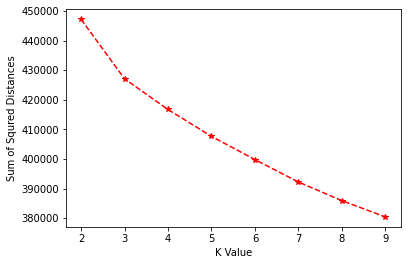

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(2,10), values, '*--',color='red')
plt.xlabel('K Value')
plt.ylabel('Sum of Squred Distances')

In [14]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [15]:
import pickle

In [16]:
# save the model to disk
filename = 'Kmeans_CL_5_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [17]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5])


print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([195474, 166760, 148348, 227187, 175833], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [18]:
#performing kmeans prediction of the entire Trees dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100, 133)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(normalized)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\VIT Studies\CV\Positive and Negative\FinalTrees.csv', mode='a',header=False,index=False)

In [19]:
#performing kmeans prediction of the entire Streetlights dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(100, 133)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(normalized)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\VIT Studies\CV\Positive and Negative\FinalStreetlights.csv', mode='a',header=False,index=False)

In [20]:
#performing kmeans prediction of the entire Negatives dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=2
data=[]
k=1
for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    resize=(100, 133)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(normalized)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    if (k>3000):
        break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('D:\VIT Studies\CV\Positive and Negative\FinalNegatives.csv', mode='a',header=False,index=False)

In [21]:
#Displaying the kmeans predicted data
print("Trees")
dat1= pd.read_csv(r'D:\VIT Studies\CV\Positive and Negative\FinalTrees.csv',header=None)
print(dat1)

Trees
       0   1   2   3   4  5
0     22  63  34  48  10  0
1     27  32  28  33  28  0
2     18   7  20  18  22  0
3     28  11  12  52  29  0
4     57  30  34  51  19  0
...   ..  ..  ..  ..  .. ..
3048  19  46  28  52  29  0
3049  33  46  37  51  19  0
3050  24  58  27  33  13  0
3051  15  24  16  39  35  0
3052  29  29  22  45   9  0

[3053 rows x 6 columns]


In [22]:
print("Streetlight")
dat2= pd.read_csv(r'D:\VIT Studies\CV\Positive and Negative\FinalStreetlights.csv',header=None)
print(dat2)

Streetlight
       0   1   2   3   4  5
0      5   5   7  12  24  1
1     23  23   7   6  18  1
2      6   5   9   6  16  1
3     10   7   6  10  18  1
4      6   6   6   8  17  1
...   ..  ..  ..  ..  .. ..
3174   4   8   4   8  20  1
3175   8  17   2  14  18  1
3176  15   8   7  14  20  1
3177  14   9   6  10  15  1
3178  26  16  27  28  22  1

[3179 rows x 6 columns]


In [23]:
print("Negatives")
dat3= pd.read_csv(r'D:\VIT Studies\CV\Positive and Negative\FinalNegatives.csv',header=None)
print(dat3)

Negatives
       0   1   2   3   4  5
0     10   3   3  11  12  2
1     35  19  23  43  23  2
2     43  19  19  28  11  2
3     47  30  24  14  32  2
4      6   2   7   0  23  2
...   ..  ..  ..  ..  .. ..
2995  32  14  18  30  18  2
2996  13   4   6  13  30  2
2997  40  21  17  46  26  2
2998  48  39  36  33  15  2
2999  62  21  42  62  18  2

[3000 rows x 6 columns]


In [24]:
#appending All classes into 1 csv file

Q=dat1.append(dat2)
A=Q.append(dat3)

csv_data=A.to_csv('D:\VIT Studies\CV\Positive and Negative\FinalAll.csv', mode='a',header=False,index=False)

In [25]:
A

,0,1,2,3,4,5
0,22,63,34,48,10,0
1,27,32,28,33,28,0
2,18,7,20,18,22,0
3,28,11,12,52,29,0
4,57,30,34,51,19,0
...,...,...,...,...,...,...
2995,32,14,18,30,18,2
2996,13,4,6,13,30,2
2997,40,21,17,46,26,2
2998,48,39,36,33,15,2


In [26]:
x = A.iloc[:,0:5].values

In [27]:
x

array([[22, 63, 34, 48, 10],
       [27, 32, 28, 33, 28],
       [18,  7, 20, 18, 22],
       ...,
       [40, 21, 17, 46, 26],
       [48, 39, 36, 33, 15],
       [62, 21, 42, 62, 18]], dtype=int64)

In [28]:
y = A.iloc[:,5].values

In [29]:
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_transform = scaler.fit_transform(x)

In [31]:
x_transform

array([[ 0.06726609,  3.59936689,  1.64477099,  1.39025749, -0.94666391],
       [ 0.4522156 ,  1.11865655,  1.09572102,  0.50102285,  0.94481996],
       [-0.24069352, -0.88191631,  0.36365441, -0.3882118 ,  0.31432534],
       ...,
       [ 1.45308433,  0.23840449,  0.08912943,  1.27169287,  0.73465509],
       [ 2.06900355,  1.67881695,  1.82778764,  0.50102285, -0.42125173],
       [ 3.14686218,  0.23840449,  2.3768376 ,  2.22020982, -0.10600441]])

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(x_transform)

PCA()

In [33]:
xpca = pca.transform(x_transform)
xpca

array([[ 3.2249618 , -1.61971405,  1.75527258,  1.17924867,  0.99938246],
       [ 1.68873367,  0.67375134,  0.7007114 ,  0.01728914,  0.05609795],
       [-0.53161818,  0.41392243,  0.10653479, -0.38664751, -0.77631661],
       ...,
       [ 1.59824708,  0.66857434, -1.1469963 , -0.00843133,  0.1268807 ],
       [ 2.95923765, -0.79411574,  0.301731  , -1.14612494,  0.2759263 ],
       [ 3.94007333, -0.35023055, -1.4588648 , -1.09950799, -1.25118353]])

In [34]:
xpca = pd.DataFrame(xpca)

In [35]:
xpca

,0,1,2,3,4
0,3.224962,-1.619714,1.755273,1.179249,0.999382
1,1.688734,0.673751,0.700711,0.017289,0.056098
2,-0.531618,0.413922,0.106535,-0.386648,-0.776317
3,0.735140,1.112194,-1.380224,0.795331,-0.408825
4,3.432291,-0.279095,-0.959373,-0.944435,-0.201114
...,...,...,...,...,...
9227,0.488300,-0.070870,-0.681888,-0.434579,-0.235355
9228,-1.524797,1.384624,-0.210922,-0.013391,-0.088652
9229,1.598247,0.668574,-1.146996,-0.008431,0.126881
9230,2.959238,-0.794116,0.301731,-1.146125,0.275926


In [36]:
xpca.shape

(9232, 5)

In [37]:
print(pca.explained_variance_ratio_) 

[0.58224672 0.19562141 0.11475909 0.05719878 0.050174  ]


In [38]:
pca = PCA(n_components=4)
pca.fit(x_transform)

PCA(n_components=4)

In [39]:
# save the model to disk
filename = 'PCA_3_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [40]:
xpca = pca.transform(x_transform)
xpca

array([[ 3.2249618 , -1.61971405,  1.75527258,  1.17924867],
       [ 1.68873367,  0.67375134,  0.7007114 ,  0.01728914],
       [-0.53161818,  0.41392243,  0.10653479, -0.38664751],
       ...,
       [ 1.59824708,  0.66857434, -1.1469963 , -0.00843133],
       [ 2.95923765, -0.79411574,  0.301731  , -1.14612494],
       [ 3.94007333, -0.35023055, -1.4588648 , -1.09950799]])

In [41]:
xpca.shape

(9232, 4)

In [42]:
print(pca.explained_variance_ratio_) 

[0.58224672 0.19562141 0.11475909 0.05719878]


In [43]:
xpca = pd.DataFrame(xpca)
xpca

,0,1,2,3
0,3.224962,-1.619714,1.755273,1.179249
1,1.688734,0.673751,0.700711,0.017289
2,-0.531618,0.413922,0.106535,-0.386648
3,0.735140,1.112194,-1.380224,0.795331
4,3.432291,-0.279095,-0.959373,-0.944435
...,...,...,...,...
9227,0.488300,-0.070870,-0.681888,-0.434579
9228,-1.524797,1.384624,-0.210922,-0.013391
9229,1.598247,0.668574,-1.146996,-0.008431
9230,2.959238,-0.794116,0.301731,-1.146125


In [44]:
B=pd.concat([xpca, pd.DataFrame(y)],axis=1)

In [45]:
B

,0,1,2,3,0
0,3.224962,-1.619714,1.755273,1.179249,0
1,1.688734,0.673751,0.700711,0.017289,0
2,-0.531618,0.413922,0.106535,-0.386648,0
3,0.735140,1.112194,-1.380224,0.795331,0
4,3.432291,-0.279095,-0.959373,-0.944435,0
...,...,...,...,...,...
9227,0.488300,-0.070870,-0.681888,-0.434579,2
9228,-1.524797,1.384624,-0.210922,-0.013391,2
9229,1.598247,0.668574,-1.146996,-0.008431,2
9230,2.959238,-0.794116,0.301731,-1.146125,2


In [46]:
csv_data=B.to_csv('D:/VIT Studies/CV/Positive and Negative/FinalPCAall.csv', mode='a',header=False,index=False)

# Training ,Testing & Classification

In [47]:
data= pd.read_csv(r'D:/VIT Studies/CV/Positive and Negative/FinalPCAall.csv',header=None)

data

,0,1,2,3,4
0,3.224962,-1.619714,1.755273,1.179249,0
1,1.688734,0.673751,0.700711,0.017289,0
2,-0.531618,0.413922,0.106535,-0.386648,0
3,0.735140,1.112194,-1.380224,0.795331,0
4,3.432291,-0.279095,-0.959373,-0.944435,0
...,...,...,...,...,...
9227,0.488300,-0.070870,-0.681888,-0.434579,2
9228,-1.524797,1.384624,-0.210922,-0.013391,2
9229,1.598247,0.668574,-1.146996,-0.008431,2
9230,2.959238,-0.794116,0.301731,-1.146125,2


In [48]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:4].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,4]
print("Y values")
print(y)

X values
[[ 3.2249618  -1.61971405  1.75527258  1.17924867]
 [ 1.68873367  0.67375134  0.7007114   0.01728914]
 [-0.53161818  0.41392243  0.10653479 -0.38664751]
 ...
 [ 1.59824708  0.66857434 -1.1469963  -0.00843133]
 [ 2.95923765 -0.79411574  0.301731   -1.14612494]
 [ 3.94007333 -0.35023055 -1.4588648  -1.09950799]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
9227    2
9228    2
9229    2
9230    2
9231    2
Name: 4, Length: 9232, dtype: int64


In [49]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [50]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model1 = DecisionTreeClassifier(max_depth=13)
filename = 'model1.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model1.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred1 = model1.predict(x_test)
#Results
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")

Decision Tree Results
Decision Tree Accuracy:  70.22198159177044 %


In [51]:
model_SVM = SVC(kernel='rbf')
model_SVM.fit(x_train, y_train)

SVC()

In [52]:
y_predSVM = model_SVM.predict(x_test)

In [53]:
y_predSVM

array([0, 2, 0, ..., 0, 0, 1], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predSVM)

array([[485,  37, 107],
       [ 27, 501, 105],
       [125, 191, 269]], dtype=int64)

In [55]:
accuracy_score(y_test, y_predSVM)

0.6794802382241473

In [67]:
print("Precision: ", precision_score(y_test, y_predSVM, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVM, average='macro'))
print("F1-score: ",f1_score(y_test, y_predSVM, average='macro'))

Precision:  0.6692919444242195
Recall/Sensitivity:  0.6741211456572483
F1-score:  0.6688553279734456


In [57]:
#Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2,
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2',
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                n_jobs=None, random_state=2, verbose=0, warm_start=False, class_weight=None, 
                                ccp_alpha=0.0, max_samples=None)
filename = 'model_RF.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_RF.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_pred4 = model_RF.predict(x_test)
#Results
print("RandomF Results")
print("RandomF Accuracy: ",accuracy_score(y_test, y_pred4)*100,"%")

RandomF Results
RandomF Accuracy:  75.90687601515972 %


In [77]:
print("Precision: ", precision_score(y_test, y_pred4, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred4, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred4, average='macro'))

Precision:  0.7521785462991556
Recall/Sensitivity:  0.7548281355920051
F1-score:  0.7520048021457425


In [76]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
model_DT= DecisionTreeClassifier(criterion="entropy")  
filename = 'model_DT.sav'
model_DT.fit(x_train, y_train)
y_pred3 = model_DT.predict(x_test)
print("Decision Tree Results")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred3)*100,"%")

Decision Tree Results
Decision Tree Accuracy:  71.03410936654033 %


In [78]:
print("Precision: ", precision_score(y_test, y_pred3, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred3, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred3, average='macro'))

Precision:  0.7044290161094953
Recall/Sensitivity:  0.7067488410114559
F1-score:  0.705153121377334


In [82]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=3)
filename = 'model_KNN.sav'
# Train the model using the training sets
model_KNN.fit(x_train, y_train)

y_pred2 = model_KNN.predict(x_test)
#Results
print("KNN Results")
print("KNN Accuracy: ",accuracy_score(y_test, y_pred2)*100,"%")

KNN Results
KNN Accuracy:  69.19328641039525 %


In [83]:
print("Precision: ", precision_score(y_test, y_pred2, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred2, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred2, average='macro'))

Precision:  0.6826136409389217
Recall/Sensitivity:  0.6871270747490429
F1-score:  0.682650739458648


In [84]:
# SVM OVR Linear
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc1 = svm.SVC(kernel='linear', C=1,gamma='auto',decision_function_shape='ovr').fit(x_train, y_train)
y_pred5 = svc1.predict(x_test)
print("SVM Linear Results")
print("SVM Linear Accuracy: ",accuracy_score(y_test, y_pred5)*100,"%")

SVM Linear Results
SVM Linear Accuracy:  64.64537087168381 %


In [85]:
print("Precision: ", precision_score(y_test, y_pred5, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred5, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred5, average='macro'))

Precision:  0.6345976382125452
Recall/Sensitivity:  0.6406588871043847
F1-score:  0.634901277747916


In [86]:
# SVM OVR Polynomial
C = 1.0 # SVM regularization parameter
svc2 = svm.SVC(kernel='poly', C=1,gamma='auto',decision_function_shape='ovr').fit(x_train, y_train)
y_pred6 = svc2.predict(x_test)
print("SVM Polynomial Results")
print("SVM Polynomial Accuracy: ",accuracy_score(y_test, y_pred6)*100,"%")

SVM Polynomial Results
SVM Polynomial Accuracy:  64.69951272333515 %


In [87]:
print("Precision: ", precision_score(y_test, y_pred6, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred6, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred6, average='macro'))

Precision:  0.6721866389501822
Recall/Sensitivity:  0.6455304224470658
F1-score:  0.6484441427555101


In [88]:
# SVM OVR Radial
C = 1.0 # SVM regularization parameter
svc3 = svm.SVC(kernel='rbf', C=1,gamma='auto',decision_function_shape='ovr').fit(x_train, y_train)
y_pred7 = svc3.predict(x_test)
print("SVM Radial Results")
print("SVM Radial Accuracy: ",accuracy_score(y_test, y_pred7)*100,"%")

SVM Radial Results
SVM Radial Accuracy:  68.11044937736871 %


In [89]:
print("Precision: ", precision_score(y_test, y_pred7, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred7, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred7, average='macro'))

Precision:  0.6712659018778687
Recall/Sensitivity:  0.6758372448921653
F1-score:  0.6708239551810604


In [90]:
# SVM OVO Linear
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc4 = svm.SVC(kernel='linear', C=1,gamma='auto',decision_function_shape='ovo').fit(x_train, y_train)
y_pred8 = svc4.predict(x_test)
print("SVM Linear Results")
print("SVM Linear Accuracy: ",accuracy_score(y_test, y_pred8)*100,"%")

SVM Linear Results
SVM Linear Accuracy:  64.64537087168381 %


In [91]:
print("Precision: ", precision_score(y_test, y_pred8, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred8, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred8, average='macro'))

Precision:  0.6345976382125452
Recall/Sensitivity:  0.6406588871043847
F1-score:  0.634901277747916


In [92]:
# SVM OVO Polynomial
C = 1.0 # SVM regularization parameter
svc5 = svm.SVC(kernel='poly', C=1,gamma='auto',decision_function_shape='ovo').fit(x_train, y_train)
y_pred9 = svc5.predict(x_test)
print("SVM Polynomial Results")
print("SVM Polynomial Accuracy: ",accuracy_score(y_test, y_pred9)*100,"%")

SVM Polynomial Results
SVM Polynomial Accuracy:  64.69951272333515 %


In [93]:
print("Precision: ", precision_score(y_test, y_pred9, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred9, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred9, average='macro'))

Precision:  0.6721866389501822
Recall/Sensitivity:  0.6455304224470658
F1-score:  0.6484441427555101


In [94]:
# SVM OVO Radial
C = 1.0 # SVM regularization parameter
svc6 = svm.SVC(kernel='rbf', C=1,gamma='auto',decision_function_shape='ovo').fit(x_train, y_train)
y_pred10 = svc6.predict(x_test)
print("SVM Radial Results")
print("SVM Radial Accuracy: ",accuracy_score(y_test, y_pred10)*100,"%")

SVM Radial Results
SVM Radial Accuracy:  68.11044937736871 %


In [95]:
print("Precision: ", precision_score(y_test, y_pred10, average='macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_pred10, average='macro'))
print("F1-score: ",f1_score(y_test, y_pred10, average='macro'))

Precision:  0.6712659018778687
Recall/Sensitivity:  0.6758372448921653
F1-score:  0.6708239551810604


# Class Prediction

In [96]:
test = []
path = r""

#Repeated the process of image pre-processing and feature extraction
img=cv2.imread(path)
resize=(100, 133)

#resize image
img=cv2.resize(img,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialise sift descriptor
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
norm = Normalizer()
normalized = norm.fit_transform(descriptors)
#convert the descriptor array into a dataframe format
out=pd.DataFrame(normalized)
print("descriptor shape ",i," : ", out.shape)

#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a = kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the histogram for all those vlaues
hist = np.histogram(a,bins=[0,1,2,3,4,5])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
test.append(hist[0])

Output = pd.DataFrame(test)
print("Histogram:\n",Output)
Output_trans = scaler.transform(Output)
print(Output_trans.shape, Output_trans)
pcaOutput = pca.transform(Output_trans)
print(pcaOutput.shape, pcaOutput)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-vijyisc5\opencv\modules\imgproc\src\resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
model_RF.predict(pcaOutput)

In [ ]:
model_SVM.predict(pcaOutput)

In [ ]:
model_DT.predict(pcaOutput)

In [ ]:
foldertest = r"D:\VIT Studies\CV\CV_CP_Dataset\content\TestN"
i=0
for filename in os.listdir(foldertest):
    #path
    path=os.path.join(foldertest,filename)
    img=cv2.imread(path)
    resize=(100, 133)

    #resize image
    img=cv2.resize(img,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)

    #train the model for the features i.e. for all elements in the Dataframe
    array_double = np.array(out, dtype=np.double)
    a = kmeans.predict(array_double)

    #get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
    #kmeans.labels_ give us the label vlaue of the feature that its clustered into
    #hist will give the histogram for all those vlaues
    hist = np.histogram(a,bins=[0,1,2,3,4,5])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    test.append(hist[0])
    i=i+1

Output = pd.DataFrame(test)
Output_trans = scaler.transform(Output)
pcaOutput = pca.transform(Output_trans)
model_RF.predict(pcaOutput)